In [30]:
%matplotlib inline
import os, glob
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn import preprocessing
from IPython.display import display
filepath = os.path.join('..','competition_data')
files = glob.glob(os.path.join(filepath,'*.csv'))
files

['../competition_data/bill_of_materials.csv',
 '../competition_data/comp_adaptor.csv',
 '../competition_data/comp_boss.csv',
 '../competition_data/comp_elbow.csv',
 '../competition_data/comp_float.csv',
 '../competition_data/comp_hfl.csv',
 '../competition_data/comp_nut.csv',
 '../competition_data/comp_other.csv',
 '../competition_data/comp_sleeve.csv',
 '../competition_data/comp_straight.csv',
 '../competition_data/comp_tee.csv',
 '../competition_data/comp_threaded.csv',
 '../competition_data/components.csv',
 '../competition_data/specs.csv',
 '../competition_data/test_set.csv',
 '../competition_data/train_set.csv',
 '../competition_data/tube.csv',
 '../competition_data/tube_end_form.csv',
 '../competition_data/type_component.csv',
 '../competition_data/type_connection.csv',
 '../competition_data/type_end_form.csv']

In [14]:
billdf = pd.read_csv(os.path.join(filepath,'bill_of_materials.csv'),header=0, index_col=0)
billdf.head()

,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
tube_assembly_id,,,,,,,,,,,,,,,,
TA-00001,C-1622,2,C-1629,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TA-00002,C-1312,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TA-00003,C-1312,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TA-00004,C-1312,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TA-00005,C-1624,1,C-1631,1,C-1641,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
tubedf = pd.read_csv(os.path.join(filepath,'tube.csv'),header=0, index_col=0)
tubedf.head()

,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
tube_assembly_id,,,,,,,,,,,,,,,
TA-00001,SP-0035,12.70,1.65,164,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0
TA-00002,SP-0019,6.35,0.71,137,8,19.05,N,N,N,N,EF-008,EF-008,0,0,0
TA-00003,SP-0019,6.35,0.71,127,7,19.05,N,N,N,N,EF-008,EF-008,0,0,0
TA-00004,SP-0019,6.35,0.71,137,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
TA-00005,SP-0029,19.05,1.24,109,4,50.80,N,N,N,N,EF-003,EF-003,0,0,0


In [21]:
traindf = pd.read_csv(os.path.join(filepath,'train_set.csv'), parse_dates = ['quote_date'], header=0, index_col=0)
testdf = pd.read_csv(os.path.join(filepath,'test_set.csv'), parse_dates = ['quote_date'], header=0, index_col=0)

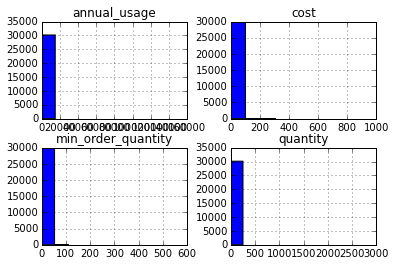

In [40]:
f = plt.figure()    
traindf.hist()
display(f)

In [52]:
traindf[0:1]

,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
tube_assembly_id,,,,,,,
TA-00002,S-0066,2013-07-07,0,0,Yes,1,21.905933


# 1. Training Set Predictor Analyzation
## 1.1 Analyzing dates
### 1.1.1 Years
First check for the years when the quotes  were made

In [65]:
years = [quote_date.year for quote_date in traindf['quote_date']]
year_s = pd.Series(years, index=range(len(years)))
year_s.value_counts()

2013    20118
2012     3358
2014     1929
2011     1641
2008      478
2010      419
2009      410
2007      400
2006      229
2002      187
2005      180
2004      170
2000      156
2001      146
2003       91
1999       79
1997       63
1996       47
1998       29
1995       28
2015       22
1994        9
1982        6
1993        4
1992        3
2016        3
1988        2
1989        2
1991        2
1987        1
2017        1
dtype: int64

As can be seen the count statistics, overhelming quotes are for 2013. In the first pass, we consider year 2013 only.

In [75]:
mask_2013 = [traindf.quote_date[i].year == 2013 for i in range(len(traindf.quote_date))]
traindf_2013 = traindf[mask]

In [78]:
traindf_2013.describe()

,annual_usage,min_order_quantity,quantity,cost
count,20118.000000,20118.000000,20118.000000,20118.000000
mean,59.694204,1.167363,50.280396,10.101067
std,1337.088465,9.063707,76.819286,18.852463
min,0.000000,0.000000,1.000000,0.653784
25%,0.000000,0.000000,2.000000,3.499830
50%,0.000000,0.000000,10.000000,5.817285
75%,0.000000,0.000000,50.000000,11.826533
max,150000.000000,285.000000,400.000000,739.207002


In [80]:
traindf_2013[0:1]

,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
tube_assembly_id,,,,,,,
TA-00002,S-0066,2013-07-07,0,0,Yes,1,21.905933


### 1.1.2 Months
Now lets see the statistics related to the months when the quotes were made

In [81]:
months = [quote_date.month for quote_date in traindf_2013['quote_date']]
month_s = pd.Series(months, index=range(len(months)))
month_s.value_counts()

8     4219
7     3236
6     3085
10    2973
9     2819
5      875
4      602
2      571
11     540
12     436
3      402
1      360
dtype: int64

The counts looks like some distribution curve. The appropriate question to tackle 
next is if quotes are made in different months with different price points keeping 
everything else constant.

In [82]:
mask_jan = [traindf_2013.quote_date[i].month == 1 for i in range(len(traindf_2013.quote_date))]
mask_feb = [traindf_2013.quote_date[i].month == 2 for i in range(len(traindf_2013.quote_date))]
mask_mar = [traindf_2013.quote_date[i].month == 3 for i in range(len(traindf_2013.quote_date))]
mask_apr = [traindf_2013.quote_date[i].month == 4 for i in range(len(traindf_2013.quote_date))]
mask_may = [traindf_2013.quote_date[i].month == 5 for i in range(len(traindf_2013.quote_date))]
mask_jun = [traindf_2013.quote_date[i].month == 6 for i in range(len(traindf_2013.quote_date))]
mask_jul = [traindf_2013.quote_date[i].month == 7 for i in range(len(traindf_2013.quote_date))]
mask_aug = [traindf_2013.quote_date[i].month == 8 for i in range(len(traindf_2013.quote_date))]
mask_sep = [traindf_2013.quote_date[i].month == 9 for i in range(len(traindf_2013.quote_date))]
mask_oct = [traindf_2013.quote_date[i].month == 10 for i in range(len(traindf_2013.quote_date))]
mask_nov = [traindf_2013.quote_date[i].month == 11 for i in range(len(traindf_2013.quote_date))]
mask_dec = [traindf_2013.quote_date[i].month == 12 for i in range(len(traindf_2013.quote_date))]

traindf_2013_jan = traindf_2013[mask_jan]
traindf_2013_feb = traindf_2013[mask_feb]
traindf_2013_mar = traindf_2013[mask_mar]
traindf_2013_apr = traindf_2013[mask_apr]
traindf_2013_may = traindf_2013[mask_may]
traindf_2013_jun = traindf_2013[mask_jun]
traindf_2013_jul = traindf_2013[mask_jul]
traindf_2013_aug = traindf_2013[mask_aug]
traindf_2013_sep = traindf_2013[mask_sep]
traindf_2013_oct = traindf_2013[mask_oct]
traindf_2013_nov = traindf_2013[mask_nov]
traindf_2013_dec = traindf_2013[mask_dec]

In [87]:
traindf_2013_jan[0:1]

,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
tube_assembly_id,,,,,,,
TA-00228,S-0072,2013-01-16,25,1,Yes,1,11.851572


In [99]:
jan_asmbly_id = traindf_2013_jan.index
feb_asmbly_id = traindf_2013_feb.index
mar_asmbly_id = traindf_2013_mar.index
apr_asmbly_id = traindf_2013_apr.index
may_asmbly_id = traindf_2013_may.index
jun_asmbly_id = traindf_2013_jun.index
jul_asmbly_id = traindf_2013_jul.index
aug_asmbly_id = traindf_2013_aug.index
sep_asmbly_id = traindf_2013_sep.index
oct_asmbly_id = traindf_2013_oct.index
nov_asmbly_id = traindf_2013_nov.index
dec_asmbly_id = traindf_2013_dec.index

In [103]:
for key in feb_asmbly_id:
    if key in jan_asmbly_id:
        print key

TA-08132
TA-11058


In [105]:
traindf_2013.loc['TA-11058']

,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
tube_assembly_id,,,,,,,
TA-11058,S-0072,2013-02-26,50,5,Yes,1,6.106620
TA-11058,S-0072,2013-01-16,50,5,Yes,1,5.558554


The price quotes for tube assembly 'TA-11058' shows that multiple quotes with different price points were given
in a single year in different months. So we can't treat the whole 2013 as the single time point. 
One approach would be to consider only the last quote in 2013 and ignore the rest. This can
let us treat 2013 as single the point.
Another approach would be consider all quotes in 2012, 2013 and 2014 years, 
and starting with 2012-01-01 as reference with a value 1, take the date of quote
as another predictor variable with a value that is equal to the offset from 2011-12-31. 

### 1.1.3 Best option
The second option to consider the date of quote as an integer using 2011-12-31 considered as reference with a value of 0 looks like the best choice.

## 1.2 Analyzing Suppliers
The objective is to see if there is a competition between multiple suppliers.
If two or more suppliers are giving a price quote for a tube assembly within a window of "X" months, then 
it can be hypothesized that there exists multiplie suppliers for a componenet. 


In [132]:
cnt = 0
for index in sorted(list(set(traindf_2013.index))):
    if isinstance(traindf_2013.loc[index]['supplier'],str):
        continue
    elif len(traindf_2013.loc[index]['supplier'].unique()) > 1:
        print index
    cnt += 1
    if cnt > 99:
        break

The output is none. Hence for each tube assembly there is only one supplier in 2013. So we don't have worry about the issue of solo-supplier vs multi-supplier.

In [146]:
traindf_2013.supplier.value_counts()[0:10]

S-0066    17859
S-0041      970
S-0072      578
S-0026      209
S-0058      116
S-0013      103
S-0064       78
S-0054       67
S-0104       31
S-0042       18
dtype: int64

Majority of the tubes are supplied by 'S-0066' supplier. Lets focus only that supplier in first round


## 1.3 Annual usage

In [147]:
traindf_2013.annual_usage.value_counts()[0:10]

0     16658
1      1584
5       170
20      102
50       61
4        56
2        47
11       38
40       34
13       34
dtype: int64

The annual usage value for majority of quotes is zero. This implies annual usage can be safely ignored in the first round.

## 1.4 Minimum order quantity

In [138]:
traindf_2013.min_order_quantity.value_counts()[0:10]

0     18660
1       755
20      114
10       70
50       49
5        46
25       34
30       29
2        28
4        28
dtype: int64

Again minimum order quantity is overwhelmingly zero. So it can also be ignored in the first round.

## 1.5 Bracket Pricing

In [140]:
traindf_2013.bracket_pricing.describe()

count     20118
unique        2
top         Yes
freq      19047
Name: bracket_pricing, dtype: object

Nearly almost all quotes have bracket pricing. 

## 1.6 Predictor & Data pruning.

For first round, we are removing the non-bracket pricing data from the model and retaining only supplier 'S-0066'.
The predictors annual_usage and  min_order_quantity are also removed. All the data pertaining to the 4 predictors can be removed. For date use the offset from 2011-12-31. Applying these transformations to the data gives

In [153]:
traindf_2013_prune1 = traindf_2013[traindf_2013.bracket_pricing == 'Yes']
print 'Data count before pruning bracket pricing', len(traindf_2013)
print 'Data count after pruning for bracket pricing', len(traindf_2013_prune1)
traindf_2013_prune2 = traindf_2013_prune1[traindf_2013_prune1.supplier == 'S-0066']
print 'Data count after pruning for supplier S-0066', len(traindf_2013_prune2)
traindf_2013_prune3 = traindf_2013_prune2.loc[:,['quote_date','quantity','cost']]


Data count before pruning bracket pricing 20118
Data count after pruning for bracket pricing 19047
Data count after pruning for supplier S-0066 17744


In [155]:
from datetime import date
days = [date.days for date in traindf_2013_prune3.quote_date - date(2012,12,31)]
traindf_2013_prune = pd.DataFrame({'quote_date':days, 'quantity': traindf_2013_prune3.quantity, 
                                   'cost': traindf_2013_prune3.cost}, index=traindf_2013_prune3.index)
traindf_2013_prune[0:2]


,cost,quantity,quote_date
tube_assembly_id,,,
TA-00002,21.905933,1,188
TA-00002,12.341214,2,188


Now to the above the tube assembly info is added

# 2. Tube data predictor analysis

In [157]:
tubedf.columns

Index([u'material_id', u'diameter', u'wall', u'length', u'num_bends',
       u'bend_radius', u'end_a_1x', u'end_a_2x', u'end_x_1x', u'end_x_2x',
       u'end_a', u'end_x', u'num_boss', u'num_bracket', u'other'],
      dtype='object')

Diameter, wall, length are obviously required and they are not null for any of the tube assemblies

In [177]:
tubedf.num_bends.value_counts()[0:4]

2    5030
4    3614
3    3316
5    2313
dtype: int64

Similarly num_bends and bend radius are essential

In [180]:
print len(tubedf.num_boss[tubedf.num_boss > 0])
tubedf.num_boss.value_counts()[0:3]

737


0    20461
1      583
2      112
dtype: int64

However looking at num_boss shows that most of the tubes are without bosses. So ignoring bosses in the first round.

In [186]:
print len(tubedf.num_bracket[tubedf.num_bracket > 0])
tubedf.num_bracket.value_counts()[0:4]

119


0    21079
1      102
2       13
3        2
dtype: int64

Very few tubes with brackets. So ignoring them in the first round

In [189]:
print len(tubedf.other[tubedf.other > 0])
tubedf.other.value_counts()[0:4]

367


0    20831
1      290
2       61
3        7
dtype: int64

Ignoring the 'other' parameter as well

## Create Training Set and Test Set

As stated before, we will first focus on the `bill_of_materials.csv` and `tube.csv` files

In [8]:
train = pd.merge(traindf_2013_prune,billdf, on = 'tube_assembly_id')
test = pd.merge(testdf,billdf, on = 'tube_assembly_id')
train = pd.merge(train,tubedf, on = 'tube_assembly_id')
test = pd.merge(test,tubedf, on = 'tube_assembly_id')

## Cleaning data frames

- Make a separate vector of cost for training
- drop the 'id' column from test because it looks useless. It's basically the same thing as the index
- replace NaN values in `quantity` columns with the value of 0
- Keep in mind: There are `NaN` values in 'material_id' and 'component_id'. I did not touch them as requested.


In [95]:
cost = train['cost'].values
train = train.drop('cost', axis = 1)
test = test.drop('id',axis = 1)

In [96]:
print 'Train columns'
print
print train.columns
print '\n\n'
print 'Test columns'
print test.columns
print '\n\n'
print 'Train shape:', train.shape
print 'Test shape:', test.shape

Train columns

Index([u'tube_assembly_id', u'supplier', u'quote_date', u'annual_usage',
       u'min_order_quantity', u'bracket_pricing', u'quantity',
       u'component_id_1', u'quantity_1', u'component_id_2', u'quantity_2',
       u'component_id_3', u'quantity_3', u'component_id_4', u'quantity_4',
       u'component_id_5', u'quantity_5', u'component_id_6', u'quantity_6',
       u'component_id_7', u'quantity_7', u'component_id_8', u'quantity_8',
       u'material_id', u'diameter', u'wall', u'length', u'num_bends',
       u'bend_radius', u'end_a_1x', u'end_a_2x', u'end_x_1x', u'end_x_2x',
       u'end_a', u'end_x', u'num_boss', u'num_bracket', u'other'],
      dtype='object')



Test columns
Index([u'tube_assembly_id', u'supplier', u'quote_date', u'annual_usage',
       u'min_order_quantity', u'bracket_pricing', u'quantity',
       u'component_id_1', u'quantity_1', u'component_id_2', u'quantity_2',
       u'component_id_3', u'quantity_3', u'component_id_4', u'quantity_4',
       u'comp

In [97]:
for x in range(6,23,2):
    column = train.columns[x]
    train[column] = train[column].replace('NaN',0)
train.iloc[:,range(6,23,2)].head()    

,quantity,quantity_1,quantity_2,quantity_3,quantity_4,quantity_5,quantity_6,quantity_7,quantity_8
0,1,2,0,0,0,0,0,0,0
1,2,2,0,0,0,0,0,0,0
2,5,2,0,0,0,0,0,0,0
3,10,2,0,0,0,0,0,0,0
4,25,2,0,0,0,0,0,0,0


In [98]:
for x in range(6,23,2):
    column = test.columns[x]
    test[column] = test[column].replace('NaN',0)
test.iloc[:,range(6,23,2)].head()  

,quantity,quantity_1,quantity_2,quantity_3,quantity_4,quantity_5,quantity_6,quantity_7,quantity_8
0,1,2,2,0,0,0,0,0,0
1,2,2,2,0,0,0,0,0,0
2,5,2,2,0,0,0,0,0,0
3,10,2,2,0,0,0,0,0,0
4,25,2,2,0,0,0,0,0,0


## Other processing

I found that scikit-learn does not handle strings in categorical data well.
[link here on kaggle](https://www.kaggle.com/c/titanic/forums/t/5379/handling-categorical-data-with-sklearn)

I'll use the LabelEncoder method as well. I won't touch the `NaN` or 'quote_date' values. Feel free to use what I did above, which is what you asked for.

In [102]:
from sklearn import preprocessing
le = sklearn.preprocessing.LabelEncoder()
for x in [0, 1, 5, 7, 9, 11, 13, 15, 17, 19, 21, 22, 28, 29, 30, 31, 32, 33, 34]:
    col = train.columns[x]
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])

In [105]:
print len(train.component_id_1.unique())
print train.shape

643
(30213, 38)
